In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

<ipython-input-2-87596ce44638>:9: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  elongated_data = np.random.multivariate_normal(mean, cov, 1000)


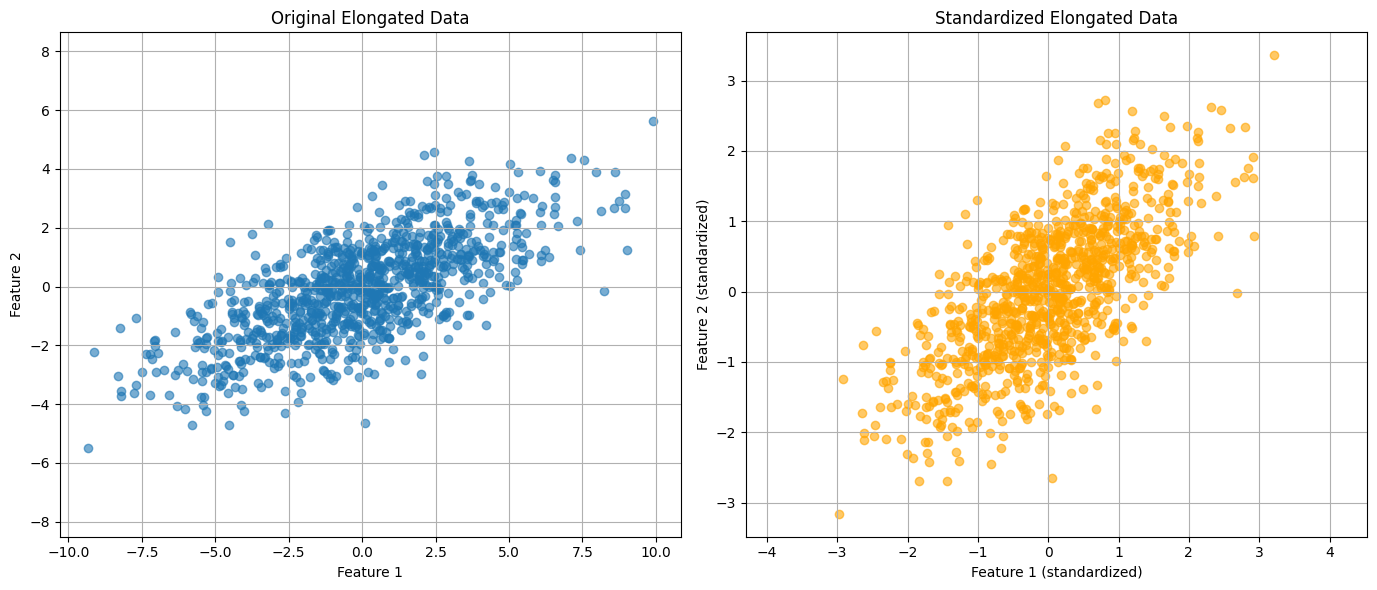

In [ ]:
# Generating elongated ellipsoid data
np.random.seed(42)

# Generate data
mean = [0, 0]
cov = [[10, 5], [5, 1]]  # Covariance matrix to create elongation

# Create an elongated ellipsoid dataset
elongated_data = np.random.multivariate_normal(mean, cov, 1000)

# Apply standardization
scaler_elongated = StandardScaler()
elongated_data_standardized = scaler_elongated.fit_transform(elongated_data)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Original Elongated Data
ax[0].scatter(elongated_data[:, 0], elongated_data[:, 1], alpha=0.6)
ax[0].set_title('Original Elongated Data')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')
ax[0].axis('equal')
ax[0].grid(True)

# Standardized Elongated Data
ax[1].scatter(elongated_data_standardized[:, 0], elongated_data_standardized[:, 1], alpha=0.6, color='orange')
ax[1].set_title('Standardized Elongated Data')
ax[1].set_xlabel('Feature 1 (standardized)')
ax[1].set_ylabel('Feature 2 (standardized)')
ax[1].axis('equal')
ax[1].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day24-standardization/Social_Network_Ads.csv')

In [ ]:
df=df.iloc[:,2:]

# Train test split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=42)
X_train.shape,X_test.shape

((280, 2), (120, 2))

# StandardScaler

In [ ]:
scaler=StandardScaler()
X_train_scaler=scaler.fit_transform(X_train)
X_test_scaler=scaler.transform(X_test)
print(X_train_scaler.mean() )
print(X_train.mean())

-7.612957883143931e-17
Age                   37.575000
EstimatedSalary    70589.285714
dtype: float64


In [ ]:
X_train

,Age,EstimatedSalary
157,29,75000
109,38,80000
17,45,26000
347,54,108000
24,46,23000
...,...,...
71,24,27000
106,26,35000
270,43,133000
348,39,77000


In [ ]:
X_test_scaler

array([[ 0.82778356, -1.43382709],
       [ 2.10507569,  0.51377487],
       [-0.94077478, -0.78462644],
       [ 1.02429004,  0.74984783],
       [-0.84252154, -1.25677236],
       [-0.7442683 , -0.25346227],
       [ 0.9260368 ,  1.07444816],
       [-0.84252154,  0.36622926],
       [ 0.23826411,  0.1301563 ],
       [ 0.43477059, -0.16493491],
       [-0.2530021 , -0.16493491],
       [ 1.51555624, -1.07971764],
       [-1.43204099, -0.66658995],
       [-1.72680071, -1.40431797],
       [-0.7442683 ,  0.48426575],
       [-0.2530021 ,  1.10395728],
       [ 1.417303  , -0.96168116],
       [ 0.82778356,  0.10064718],
       [ 0.14001087, -0.84364468],
       [ 1.81031597, -0.31248051],
       [-1.53029423, -1.28628149],
       [-0.84252154,  0.2777019 ],
       [ 0.9260368 , -1.40431797],
       [ 2.10507569,  0.15966542],
       [-1.82505395, -1.52235445],
       [ 1.31904976, -1.40431797],
       [ 0.43477059,  0.2777019 ],
       [-0.05649561, -0.51904435],
       [ 1.71206273,

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaler, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaler, columns=X_test.columns)

In [ ]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.6,70589.3
std,10.2,33948.5
min,18.0,15000.0
25%,30.0,44000.0
50%,37.0,71000.0
75%,45.0,88000.0
max,60.0,150000.0


In [ ]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,0.0
75%,0.7,0.5
max,2.2,2.3


# Effect after Scaling

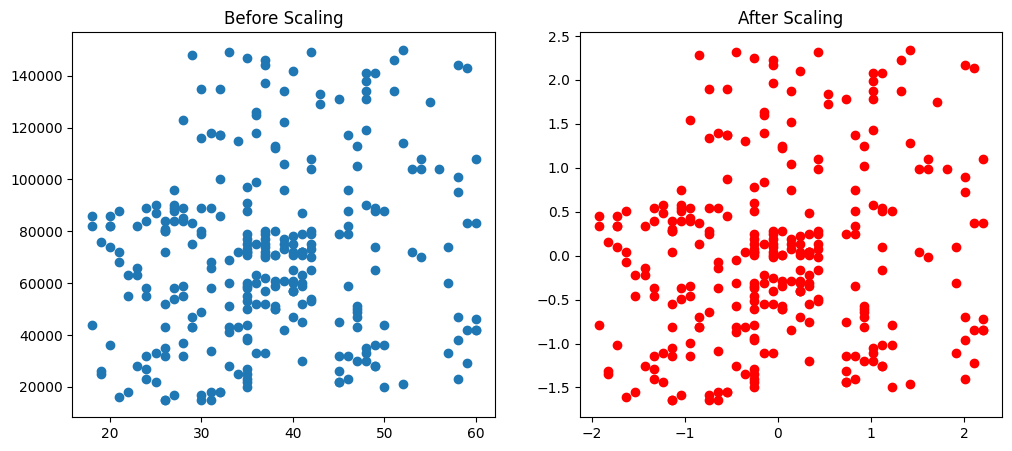

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

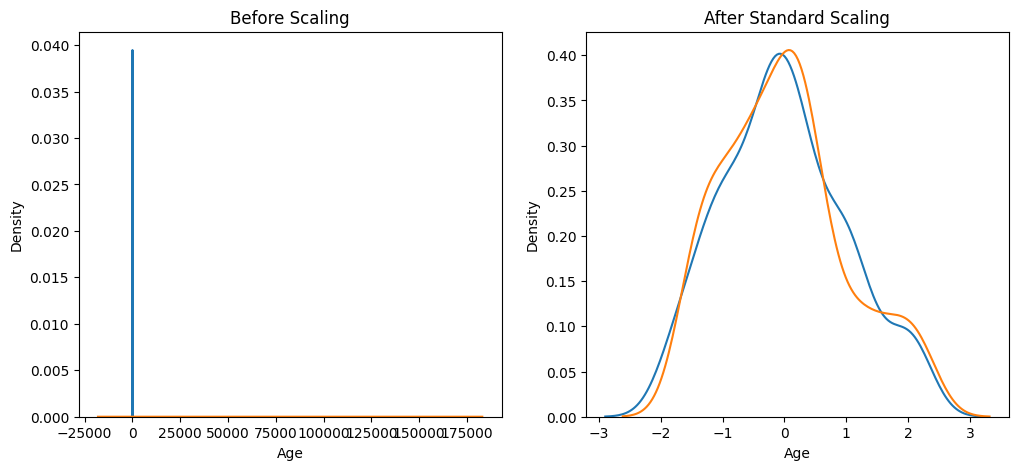

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

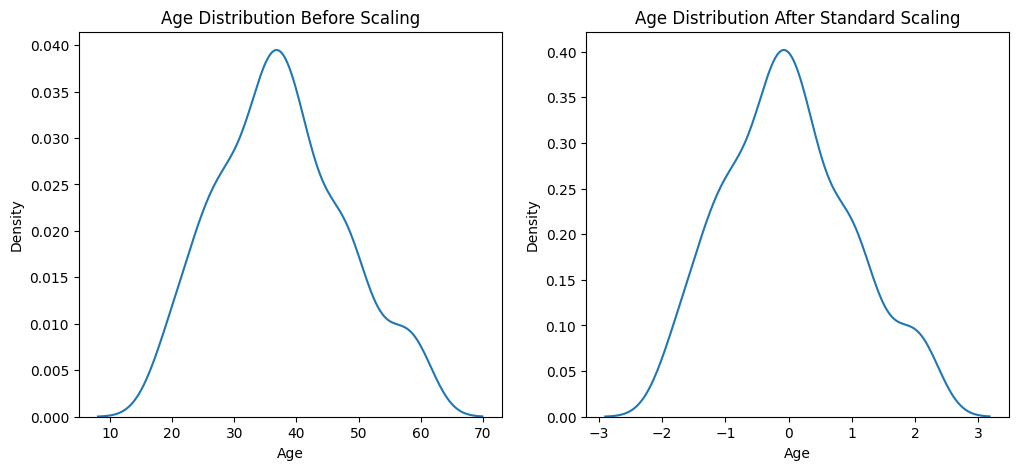

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

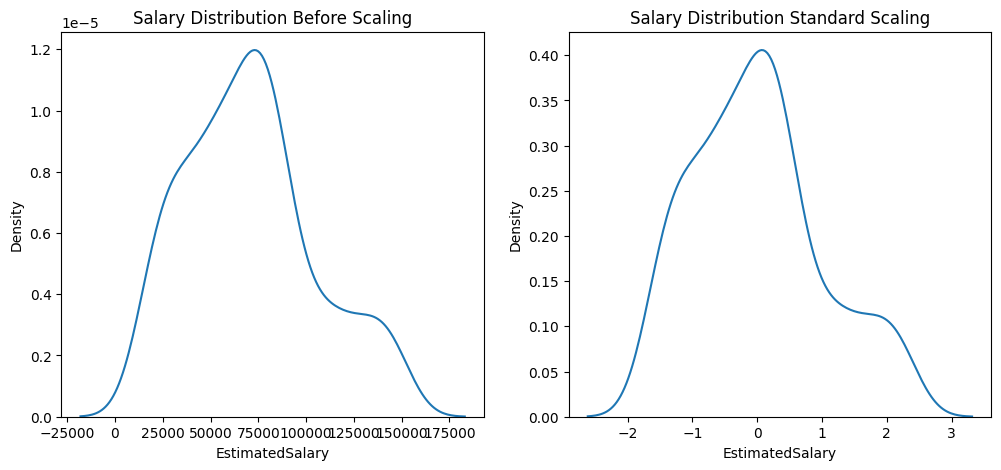

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()